Grid Temperature Data for Year 2000:
Latitude: 5.75, Longitude: 100.25, Temperature: 27.82°C
Latitude: 5.75, Longitude: 100.75, Temperature: 27.26°C
Latitude: 5.75, Longitude: 101.25, Temperature: 25.78°C
Latitude: 5.75, Longitude: 101.75, Temperature: 26.14°C
Latitude: 5.75, Longitude: 102.25, Temperature: 27.28°C
Latitude: 5.75, Longitude: 102.75, Temperature: 27.12°C
Latitude: 6.25, Longitude: 99.75, Temperature: 28.13°C
Latitude: 6.25, Longitude: 100.25, Temperature: 28.13°C
Latitude: 6.25, Longitude: 100.75, Temperature: 27.42°C
Latitude: 6.25, Longitude: 101.25, Temperature: 26.89°C
Latitude: 6.25, Longitude: 101.75, Temperature: 27.58°C
Latitude: 6.25, Longitude: 102.25, Temperature: 27.77°C
Latitude: 6.75, Longitude: 99.75, Temperature: 28.12°C
Latitude: 6.75, Longitude: 100.25, Temperature: 27.77°C
Latitude: 6.75, Longitude: 100.75, Temperature: 27.73°C
Latitude: 6.75, Longitude: 101.25, Temperature: 27.77°C
Latitude: 6.75, Longitude: 101.75, Temperature: 27.80°C
Latitude: 7.2

C:\Users\supakron\AppData\Local\Temp\ipykernel_14900\3235667870.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


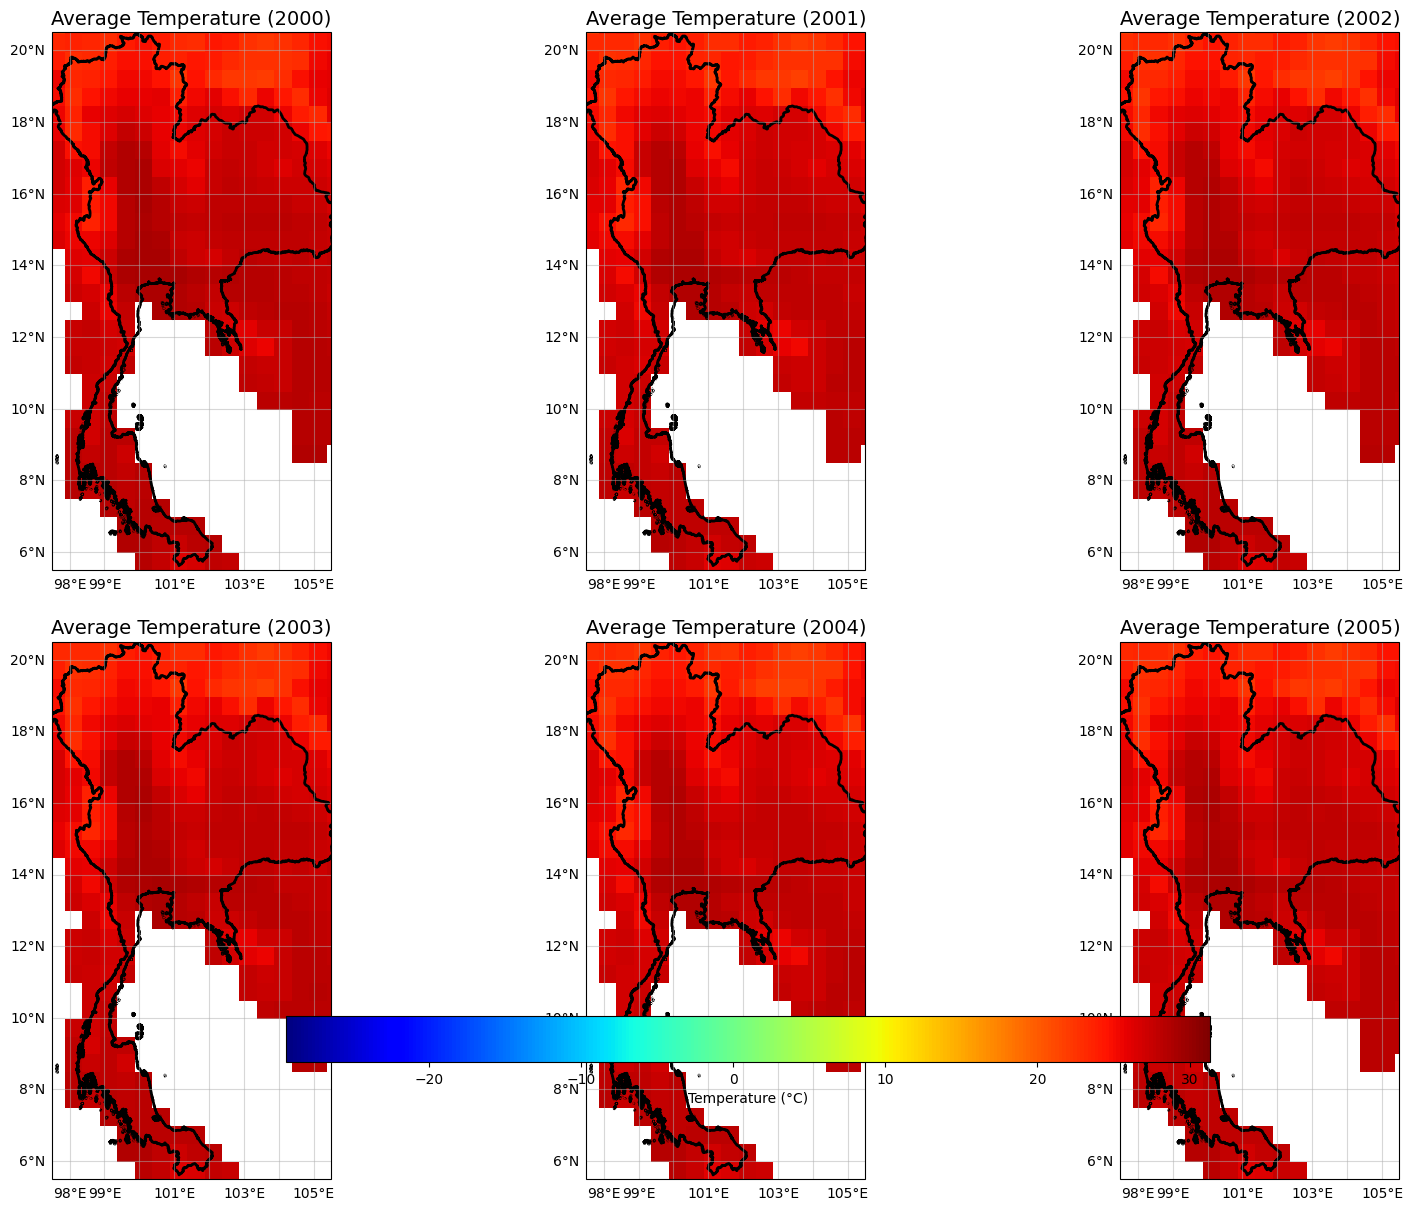

In [1]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd  # ใช้สำหรับจัดการ shapefile
import pandas as pd
import numpy as np

# เปิดไฟล์ NetCDF
ds = xr.open_dataset("../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc")
data_var = ds.metpy.parse_cf('tmp')

# แปลง 'time' ให้เป็น Datetime เพื่อกรองปีได้ง่ายขึ้น
ds['time'] = pd.to_datetime(ds['time'].values)

# เลือกข้อมูลเฉพาะปี 2000 ถึง 2005
data_filtered = ds.sel(time=slice('2000-01-01', '2005-12-31'))

# โหลด shapefile ของประเทศไทยจาก GeoPandas
gdf = gpd.read_file("../shapefile/gadm41_THA_0.shp")

# สร้าง figure และ subplots สำหรับแต่ละปี
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()  # แปลง array เป็น 1D เพื่อง่ายต่อการจัดการ

# วนลูปพล็อต heatmap และพิมพ์ค่า grid สำหรับแต่ละปี
for i, year in enumerate(range(2000, 2006)):
    # กรองข้อมูลตามปี
    data_year = data_filtered.sel(time=str(year))

    temp = data_filtered.sel(lon=slice(97.5, 105.5), lat=slice(5.5, 20.5), time=str(year))

    values = temp['tmp'].values
    lons = temp['lon'].values
    lats = temp['lat'].values

    # คำนวณค่าเฉลี่ยสำหรับปีนั้น
    data_avg = data_year['tmp'].mean(dim='time')

    # พิมพ์ grid และค่าอุณหภูมิ
    print(f"Grid Temperature Data for Year {year}:")
    for lat_idx, lat in enumerate(lats):
        for lon_idx, lon in enumerate(lons):
            temp_value = values[:, lat_idx, lon_idx].mean()
            if not np.isnan(temp_value):
                print(f"Latitude: {lat}, Longitude: {lon}, Temperature: {temp_value:.2f}°C")

    # สร้างกริดของข้อมูลที่ต้องการพล็อต
    x = data_avg.lon
    y = data_avg.lat

    # พล็อตแผนที่ใน subplot
    ax = axs[i]
    mp = ax.imshow(data_avg, extent=(x.min(), x.max(), y.min(), y.max()), cmap='jet', origin='lower')

    # กำหนดขอบเขตแผนที่ให้แสดงเฉพาะประเทศไทย
    ax.set_extent([97.5, 105.5, 5.5, 20.5], crs=ccrs.PlateCarree())

    # เพิ่มชื่อแผนที่
    ax.set_title(f'Average Temperature ({year})', fontsize=14)

    # วาดเส้นกรอบประเทศไทยโดยใช้ GeoPandas
    gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=2)

    # เพิ่มกริดไลน์
    gl = ax.gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False

# เพิ่มแถบสี (สีเดียวกันสำหรับทุกปี)
cbar = fig.colorbar(mp, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1)
cbar.set_label('Temperature (°C)')

# จัดการ layout ให้อ่านง่าย
plt.tight_layout()

# แสดงผล
plt.show()
